In [1]:
import tensorflow as tf
import numpy as np
floatX = lambda x: np.asarray(x, dtype='float32')
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## 1. Playing with some equations
### $$ y = exp(-x) $$
### $$ z = xy^2+3x^2$$
Evaluate for x=0, x=3, etc.

In [2]:
# Your code here
x = tf.placeholder(tf.float32, name='x')
y = tf.exp(-x)
z = x*y**2 + 3*x**2
sess = tf.Session()
results = sess.run([y, z, 2*z], feed_dict={x: 3} )
print results
sess.close()

[0.049787067, 27.007437, 54.014874]


## 2. Gradient Descent Optimization (Fermat's Minimum Time Principle)
![Fermat's minimum time principle](http://hyperphysics.phy-astr.gsu.edu/hbase/phyopt/imgpho/fer5.gif)

1. According to Fermat, light moves along the path that takes the minimum time. Formulate this problem with TensorFlow and use Gradient Descent Optimizer to solve it. (Hint: the speed of light in matter with refractive index $n$ is $c/n$.)
1. For various value settings of $a$, $b$, $d$ Compute the $\frac{\sin \theta_1}{\sin \theta_2}$ value and check that it is constant.

In [3]:
# Your code here
a = tf.placeholder(tf.float32, name='a')
b = tf.placeholder(tf.float32, name='b')
d = tf.placeholder(tf.float32, name='d')
x = tf.Variable(0.0, name='x')

n1 = 1.5
n2 = 2.0
c = 1.0

l1 = tf.sqrt(a**2 + x**2)
l2 = tf.sqrt(b**2 + (d-x)**2)
t1 = l1 / (c / n1)
t2 = l2 / (c / n2)

t = t1 + t2

train_step = tf.train.GradientDescentOptimizer(learning_rate=0.5).minimize(t)

sess = tf.Session()
sess.run(tf.global_variables_initializer())
for epoch in xrange(30):
    _, tval, xval = sess.run([train_step, t, x], feed_dict={a: 1.0, b: 2.0, d: 5.0})
    print "Epoch: {}, tval: {}, xval: {}".format(epoch, tval, xval)
sess.close()

Epoch: 0, tval: 12.2703294754, xval: 0.928476691246
Epoch: 1, tval: 11.1193065643, xval: 1.31572461128
Epoch: 2, tval: 10.8631639481, xval: 1.59747064114
Epoch: 3, tval: 10.7205715179, xval: 1.82385373116
Epoch: 4, tval: 10.6267871857, xval: 2.01242566109
Epoch: 5, tval: 10.5612211227, xval: 2.17176318169
Epoch: 6, tval: 10.514289856, xval: 2.30699157715
Epoch: 7, tval: 10.4804887772, xval: 2.42167592049
Epoch: 8, tval: 10.4562120438, xval: 2.51860189438
Epoch: 9, tval: 10.4389095306, xval: 2.60012245178
Epoch: 10, tval: 10.4266986847, xval: 2.66831421852
Epoch: 11, tval: 10.418176651, xval: 2.72504329681
Epoch: 12, tval: 10.4122934341, xval: 2.77198886871
Epoch: 13, tval: 10.4082736969, xval: 2.81065130234
Epoch: 14, tval: 10.4055519104, xval: 2.84235525131
Epoch: 15, tval: 10.4037246704, xval: 2.8682551384
Epoch: 16, tval: 10.402507782, xval: 2.88934540749
Epoch: 17, tval: 10.4017019272, xval: 2.90647220612
Epoch: 18, tval: 10.4011707306, xval: 2.92034864426
Epoch: 19, tval: 10.40082

In [4]:
value_sets = [{a: 1.0, b: 2.0, d: 5.0}, {a: 1.0, b: 1.0, d: 3.0}, {a: 5.0, b: 3.0, d: 5.0}]
sin1 = x / l1
sin2 = (d-x) / l2
sin_rate = sin1 / sin2

sess = tf.Session()
for value_set in value_sets:
    sess.run(tf.global_variables_initializer())
    for epoch in xrange(30):
        _, sin_rate_val = sess.run([train_step, sin_rate], feed_dict=value_set)
        print "Epoch: {}, sin_rate: {}".format(epoch, sin_rate_val)
    print ">> n2/n1: {}, sin_rate: {}".format(n2/n1, sin_rate_val)
sess.close()

Epoch: 0, sin_rate: 0.0
Epoch: 1, sin_rate: 0.758071959019
Epoch: 2, sin_rate: 0.905890166759
Epoch: 3, sin_rate: 0.983206391335
Epoch: 4, sin_rate: 1.03620874882
Epoch: 5, sin_rate: 1.07767283916
Epoch: 6, sin_rate: 1.11250150204
Epoch: 7, sin_rate: 1.14286351204
Epoch: 8, sin_rate: 1.16977572441
Epoch: 9, sin_rate: 1.1937289238
Epoch: 10, sin_rate: 1.21497642994
Epoch: 11, sin_rate: 1.23368132114
Epoch: 12, sin_rate: 1.24998927116
Epoch: 13, sin_rate: 1.26406049728
Epoch: 14, sin_rate: 1.27607882023
Epoch: 15, sin_rate: 1.28624629974
Epoch: 16, sin_rate: 1.29477441311
Epoch: 17, sin_rate: 1.30187368393
Epoch: 18, sin_rate: 1.3077454567
Epoch: 19, sin_rate: 1.31257498264
Epoch: 20, sin_rate: 1.3165293932
Epoch: 21, sin_rate: 1.31975448132
Epoch: 22, sin_rate: 1.32237648964
Epoch: 23, sin_rate: 1.32450258732
Epoch: 24, sin_rate: 1.32622313499
Epoch: 25, sin_rate: 1.32761287689
Epoch: 26, sin_rate: 1.32873392105
Epoch: 27, sin_rate: 1.32963705063
Epoch: 28, sin_rate: 1.33036410809
Epoch

## 3. Visualization
On page 5 of your slide, there is an example equation:
$$ y = A\exp(-bt)cos(wt) $$
1. Implement the equation with TensorFlow in your preferred way and add summaries. After running the session, open up the TensorBoard to see the computational graph. (Hint: Code fo adding summies and summary writer can be found in page 8.)
2. For certain value settings of $A$, $b$ and $w$, draw a plot $y$ versus $t$. (Hint: plt.plot(t, y) will do the plotting. It is better to implement $t$ as a vector to compute for multiple $t$ values at once.)

In [5]:
# Your code here
tf.reset_default_graph()

t = tf.placeholder(tf.float32, name='t')
w = tf.constant(2.0, name='w')
b = tf.Variable(0.5, name='b')
A = 1.5

y = A*tf.exp(-b*t)*tf.cos(w*t)

sess = tf.Session()
sess.run(tf.global_variables_initializer())
writer = tf.summary.FileWriter('log', sess.graph)
y_val = sess.run(y, feed_dict={t: 3.0})
print y_val

sess.close()
## Now open the Tensorboard

0.321364


[ 0.          0.05050505  0.1010101   0.15151515  0.2020202   0.25252525
  0.3030303   0.35353535  0.4040404   0.45454545  0.50505051  0.55555556
  0.60606061  0.65656566  0.70707071  0.75757576  0.80808081  0.85858586
  0.90909091  0.95959596  1.01010101  1.06060606  1.11111111  1.16161616
  1.21212121  1.26262626  1.31313131  1.36363636  1.41414141  1.46464646
  1.51515152  1.56565657  1.61616162  1.66666667  1.71717172  1.76767677
  1.81818182  1.86868687  1.91919192  1.96969697  2.02020202  2.07070707
  2.12121212  2.17171717  2.22222222  2.27272727  2.32323232  2.37373737
  2.42424242  2.47474747  2.52525253  2.57575758  2.62626263  2.67676768
  2.72727273  2.77777778  2.82828283  2.87878788  2.92929293  2.97979798
  3.03030303  3.08080808  3.13131313  3.18181818  3.23232323  3.28282828
  3.33333333  3.38383838  3.43434343  3.48484848  3.53535354  3.58585859
  3.63636364  3.68686869  3.73737374  3.78787879  3.83838384  3.88888889
  3.93939394  3.98989899  4.04040404  4.09090909  4

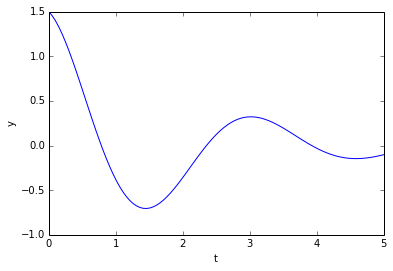

In [6]:
t_vals = np.linspace(0,5,100)
print t_vals 
sess = tf.Session()
sess.run(tf.global_variables_initializer())
y_vals = sess.run(y, feed_dict={t: t_vals})

plt.plot(t_vals, y_vals)
plt.xlabel('t')
plt.ylabel('y')
plt.show()